# **1️⃣7️⃣ Implementing a Custom Loss Function in a Neural Network: A Deep Dive 🤖📏🔥**

## **💡 Real-Life Analogy: Custom Scoring in a Basketball Game 🏀🎯**
Imagine a basketball coach who not only cares about the final score but wants to penalize underperformances more harshly than overperformances.
- For example, if a star player scores too few points, the coach assigns extra penalty to motivate improvement, whereas scoring above a threshold might be acceptable.
- This **custom scoring system** mirrors how a **custom loss function** works in a neural network—it lets you tailor the “punishment” for errors based on your specific needs.

## **📌 What Is a Custom Loss Function?**
✅ A **loss function** measures the difference between the model's predictions and the actual targets.
✅ In many cases, you may want to **design your own loss function** to better capture domain-specific requirements or priorities (e.g., penalize underestimation more than overestimation).
✅ **Custom loss functions** give you control over:
- **Error weighting** for different types of mistakes.
- **Sensitivity** to specific ranges of predictions.
- **Robustness** against outliers, etc.

## **🔍 Mathematical Formulation**
Let's consider a simple example: a **Weighted Mean Squared Error (WMSE)** loss function that penalizes errors differently depending on the target value.
- **Standard MSE**:
  $$
  L_{\text{MSE}} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
  $$
- **Custom WMSE**:
  $$
  L_{\text{WMSE}} = \frac{1}{N} \sum_{i=1}^{N} w(y_i) \cdot (y_i - \hat{y}_i)^2
  $$
  where $w(y_i)$ is a weight function.
  - **Example**: If we want to penalize under-predictions more heavily than over-predictions, we could define:
    $$
    w(y) = \begin{cases}
      2, & \text{if } y > \hat{y} \quad (\text{underprediction}) \
      1, & \text{if } y \leq \hat{y} \quad (\text{overprediction})
    \end{cases}
    $$

This customized loss can be adapted to your specific sports analytics needs. For example, in basketball, missing a target (underpredicting performance) might be more critical than overpredicting it.

## **🛠️ Python Code Example: Custom Loss Function in TensorFlow/Keras**

### **A) Define the Custom Loss Function**

In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K

def weighted_mse_loss(y_true, y_pred):
    """
    Weighted Mean Squared Error Loss.
    Penalizes underpredictions more than overpredictions.
    
    Args:
        y_true: True labels.
        y_pred: Predicted labels.
    
    Returns:
        A tensor representing the weighted MSE.
    """
    # Compute squared error
    sq_error = K.square(y_true - y_pred)
    
    # Define weights: 2 for underpredictions (y_true > y_pred), else 1
    weights = tf.where(K.greater(y_true, y_pred), 2.0, 1.0)
    
    # Compute weighted MSE
    weighted_sq_error = weights * sq_error
    loss = K.mean(weighted_sq_error)
    return loss

### **B) Build a Simple Neural Network Model Using the Custom Loss**
We'll simulate a regression task (e.g., predicting points per game) using synthetic data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set seed for reproducibility 🔒
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic sports data (e.g., Points per Game)
# Assume a simple linear relationship: points = 3 * X + noise
X = np.linspace(0, 10, 200).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.randn(200) * 2  # Linear relation with noise

In [3]:
# Build a simple feedforward model
model = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(1)
])

# Compile the model with our custom weighted MSE loss
model.compile(optimizer=Adam(learning_rate=0.01), loss=weighted_mse_loss, metrics=['mse'])
model.summary()

/Users/Oks_WORKSPACE/Desktop/DEV/MLX_Interview_Notes/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X, y, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 352.7508 - mse: 176.4099 - val_loss: 1198.9375 - val_mse: 599.4688
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 263.5701 - mse: 131.8453 - val_loss: 883.2861 - val_mse: 441.6431
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 188.8353 - mse: 94.5183 - val_loss: 617.1384 - val_mse: 308.5692
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 126.8733 - mse: 63.6078 - val_loss: 395.7763 - val_mse: 197.8882
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.0896 - mse: 38.8409 - val_loss: 222.5778 - val_mse: 111.2889
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.7943 - mse: 20.8926 - val_loss: 104.6245 - val_mse: 52.3123
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.9910 - mse: 10.3057 - val_loss: 40.6916 - val_mse: 20.3458
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4387 - mse: 5.9894 - val_loss: 15.2310 - val_mse: 7.6264
Epoch 9/100
10/10

/Users/Oks_WORKSPACE/Desktop/DEV/MLX_Interview_Notes/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Oks_WORKSPACE/Desktop/DEV/MLX_Interview_Notes/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Oks_WORKSPACE/Desktop/DEV/MLX_Interview_Notes/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


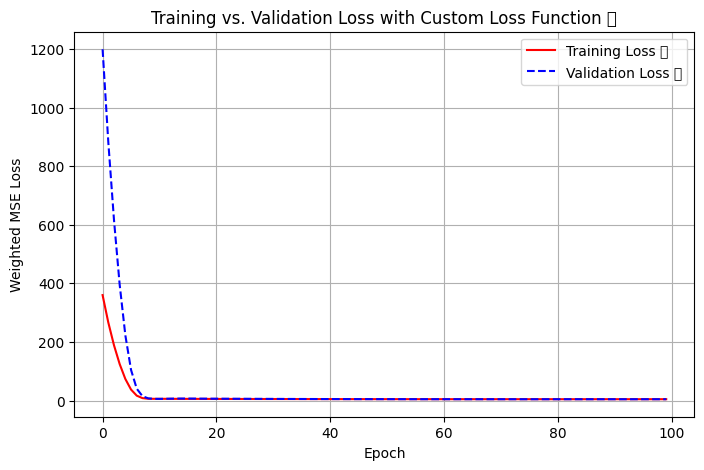

In [ ]:
# Plot training and validation loss over epochs
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], 'r-', label="Training Loss")
plt.plot(history.history['val_loss'], 'b--', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Weighted MSE Loss")
plt.title("Training vs. Validation Loss with Custom Loss Function")
plt.legend()
plt.grid(True)
plt.show()

🔍 Final Loss on Training Data: 4.8064
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


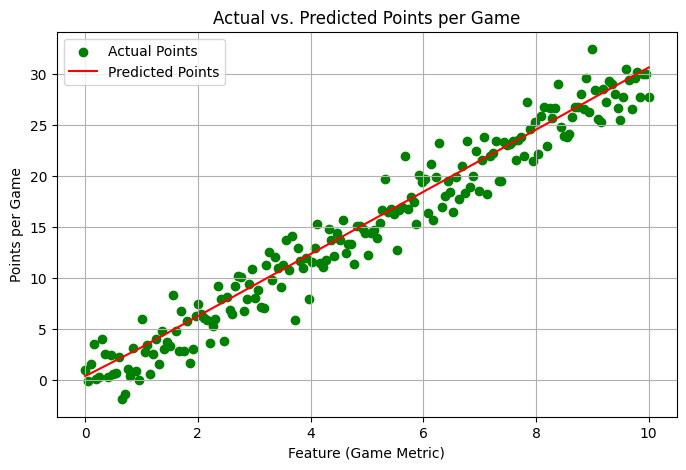

In [6]:
# Evaluate the model on training data and make predictions
loss, mse_val = model.evaluate(X, y, verbose=0)
print(f"🔍 Final Loss on Training Data: {loss:.4f}")
predictions = model.predict(X)

# Plot Actual vs. Predicted
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='green', label="Actual Points")
plt.plot(X, predictions, color='red', label="Predicted Points")
plt.xlabel("Feature (Game Metric)")
plt.ylabel("Points per Game")
plt.title("Actual vs. Predicted Points per Game")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
y, predictions

(array([ 0.99342831, -0.12577483,  1.59688461,  3.49832102,  0.13470833,
         0.28549493,  4.06294824,  2.59014584,  0.26708138,  2.44190401,
         0.5807023 ,  0.72683195,  2.29296977, -1.86676149, -1.3392829 ,
         1.13673147,  0.38639806,  3.19130874,  0.89751969,  0.03971421,
         5.94637291,  2.71427654,  3.45163932,  0.61784031,  2.529325  ,
         3.9906894 ,  1.61761084,  4.8217478 ,  3.01982815,  3.7884718 ,
         3.31919984,  8.3779232 ,  4.79712615,  2.85945251,  6.77071796,
         2.83469461,  5.84486287,  1.6585492 ,  3.07227112,  6.27311946,
         7.50708391,  6.52364108,  6.10036173,  5.88020467,  3.67612185,
         5.34423118,  6.01339582,  9.19967159,  7.92341748,  3.86085436,
         8.18585638,  6.91827765,  6.48535198,  9.21330233, 10.20270256,
        10.15401752,  6.76377601,  7.97454007,  9.40624546, 10.84556262,
         8.08687765,  8.82466195,  7.13406372,  7.10507419, 11.27329285,
        12.51147503,  9.8057285 , 12.10756831, 10.9

### **C) Explanation of the Code & Output:**
- **Custom Loss Function**:
  - The function `weighted_mse_loss` computes the squared error and applies different weights:
    - **Weight 2** if $y_{true} > y_{pred}$ (underprediction)
    - **Weight 1** otherwise.
  - This makes the model **penalize underpredictions more heavily**.

- **Model Training**:
  - We build a simple feedforward network with one hidden layer.
  - The model is compiled with our **custom loss** and trained on synthetic data.
  - Training and validation loss curves are plotted, showing how the loss decreases over epochs.

- **Visualization**:
  - A scatter plot of actual vs. predicted points helps visualize the model's performance.

- **Real-Life Impact**:
  - In sports, such a custom loss function can help adjust predictions where underestimating performance (or any other critical metric) is more detrimental than overestimating it. This could be crucial for decision-making in coaching or scouting. 🎯🏀⚽

## **🔥 Final Takeaways**
1. **Custom Loss Functions** give you the flexibility to **penalize errors differently** based on domain-specific needs. 🛠️🎯
2. The **weighted MSE** example penalizes underpredictions more, which might be critical in sports analytics when missing key performances has a high cost. 📉🚀
3. **Implementation** in TensorFlow/Keras is straightforward by defining a Python function and passing it as the loss parameter. 🐍💡
4. **Visualizations** of loss curves and prediction plots help both technical and non-technical audiences appreciate the model’s performance. 📊🎨